# <font color=#FF0000>Logistic Regression</font>

## Algerian Forest Dataset

In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#importing data to dataframe
df = pd.read_csv(r'C:\Users\Shivanand\Downloads\Algerian_forest_fires_dataset.csv,.csv', 
                     skipinitialspace = True)

In [3]:
df.head()  #this gives top 5 records of the data

day  month  year  Temperature  RH  Ws  Rain   FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18    0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13    1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22   13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13    2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16    0.0  64.8  3.0  14.2  1.2  3.9   

   FWI    Classes    
0  0.5  not fire     
1  0.4  not fire     
2  0.1  not fire     
3  0.0  not fire     
4  0.5  not fire

In [4]:
df.tail() # this gives last 5 records of the data

day  month  year  Temperature  RH  Ws  Rain   FFMC   DMC    DC  ISI  \
239   26      9  2012           30  65  14    0.0  85.4  16.0  44.5  4.5   
240   27      9  2012           28  87  15    4.4  41.1   6.5   8.0  0.1   
241   28      9  2012           27  87  29    0.5  45.9   3.5   7.9  0.4   
242   29      9  2012           24  54  18    0.1  79.7   4.3  15.2  1.7   
243   30      9  2012           24  64  15    0.2  67.3   3.8  16.5  1.2   

      BUI  FWI     Classes    
239  16.9  6.5       fire     
240   6.2  0.0   not fire     
241   3.4  0.2   not fire     
242   5.1  0.7   not fire     
243   4.8  0.5  not fire

In [5]:
df.shape   #shape of the data

(244, 14)

In [6]:
df.info()   #this gives more information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 26.8+ KB


In [7]:
#retriving statistical information from data set using describe() function
df.describe().T

count         mean        std     min       25%      50%  \
day          244.0    15.754098   8.825059     1.0     8.000    16.00   
month        244.0     7.500000   1.112961     6.0     7.000     7.50   
year         244.0  2012.000000   0.000000  2012.0  2012.000  2012.00   
Temperature  244.0    32.172131   3.633843    22.0    30.000    32.00   
RH           244.0    61.938525  14.884200    21.0    52.000    63.00   
Ws           244.0    15.504098   2.810178     6.0    14.000    15.00   
Rain         244.0     0.760656   1.999406     0.0     0.000     0.00   
FFMC         244.0    77.887705  14.337571    28.6    72.075    83.50   
DMC          244.0    14.673361  12.368039     0.7     5.800    11.30   
DC           244.0    49.288115  47.619662     6.9    13.275    33.10   
ISI          244.0     4.774180   4.175318     0.0     1.400     3.50   
BUI          244.0    16.664754  14.204824     1.1     6.000    12.25   
FWI          244.0     7.006557   7.438889     0.0     0.700     4.20   

                  75%     max  
day            23.000    31.0  
month           8.000     9.0  
year         2012.000  2012.0  
Temperature    35.000    42.0  
RH             73.250    90.0  
Ws             17.000    29.0  
Rain            0.500    16.8  
FFMC           88.300    96.0  
DMC            20.750    65.9  
DC             68.150   220.4  
ISI             7.300    19.0  
BUI            22.525    68.0  
FWI            11.375    31.1

In [8]:
#checking the null values in the dataset
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

## setting the region for the dataset

In [9]:
df.loc[:126,'region'] = 0
df.loc[126:,'region'] = 1

In [10]:
df.head(2)

day  month  year  Temperature  RH  Ws  Rain   FFMC  DMC   DC  ISI  BUI  \
0    1      6  2012           29  57  18    0.0  65.7  3.4  7.6  1.3  3.4   
1    2      6  2012           29  61  13    1.3  64.4  4.1  7.6  1.0  3.9   

   FWI    Classes    region  
0  0.5  not fire        0.0  
1  0.4  not fire        0.0

In [11]:
df.tail(2)

day  month  year  Temperature  RH  Ws  Rain   FFMC  DMC    DC  ISI  BUI  \
242   29      9  2012           24  54  18    0.1  79.7  4.3  15.2  1.7  5.1   
243   30      9  2012           24  64  15    0.2  67.3  3.8  16.5  1.2  4.8   

     FWI     Classes    region  
242  0.7   not fire        1.0  
243  0.5  not fire         1.0

# DATA CLEANING

In [12]:
df.rename(columns={"Classes  ":"Classes"},inplace=True)

In [13]:
df.columns = [x.strip() for x in df.columns]

In [14]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [15]:
df['Classes'] = df['Classes'].str.rstrip()

In [16]:
df['Classes']=df['Classes'].map({'not fire':0,'fire':1})
df.sample(5)

day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC     DC   ISI  \
206   24      8  2012           35  38  15   0.0  92.1  51.3  147.7  12.2   
209   27      8  2012           36  54  14   0.0  91.0  65.9  177.3  10.0   
211   29      8  2012           35  53  17   0.5  80.2  20.7  149.2   2.7   
212   30      8  2012           34  49  15   0.0  89.2  24.8  159.1   8.1   
208   26      8  2012           33  37  16   0.0  92.2  61.3  167.2  13.1   

      BUI   FWI  Classes  region  
206  54.9  26.9        1     1.0  
209  68.0  26.1        1     1.0  
211  30.6   5.9        1     1.0  
212  35.7  16.0        1     1.0  
208  64.0  30.3        1     1.0

## Deleting unwanted columns in the Dataset

In [17]:
df.drop('year',axis = 1, inplace = True)

In [18]:
df.head()

day  month  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI  \
0    1      6           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4  0.5   
1    2      6           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9  0.4   
2    3      6           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3    4      6           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7  0.0   
4    5      6           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9  0.5   

   Classes  region  
0        0     0.0  
1        0     0.0  
2        0     0.0  
3        0     0.0  
4        0     0.0

# <font color=green>Exploratory Data Analysis</font>

In [19]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 14 numerical features : ['day', 'month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region']

We have 0 categorical features : []


# Feature Information
1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)Weather data observations 
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42 
3. RH : Relative Humidity in %: 21 to 90 
4. Ws :Wind speed in km/h: 6 to 29 
5. Rain: total day in mm: 0 to 16.8 FWI Components 
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5 
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9 
8. Drought Code (DC) index from the FWI system: 7 to 220.4 
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5 
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68 
11. Fire Weather Index (FWI) Index: 0 to 31.1 
12. Classes: two classes, namely â€œFireâ€ and â€œnot Fireâ€

## Univariate Analysis
>The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

## Numerical Features

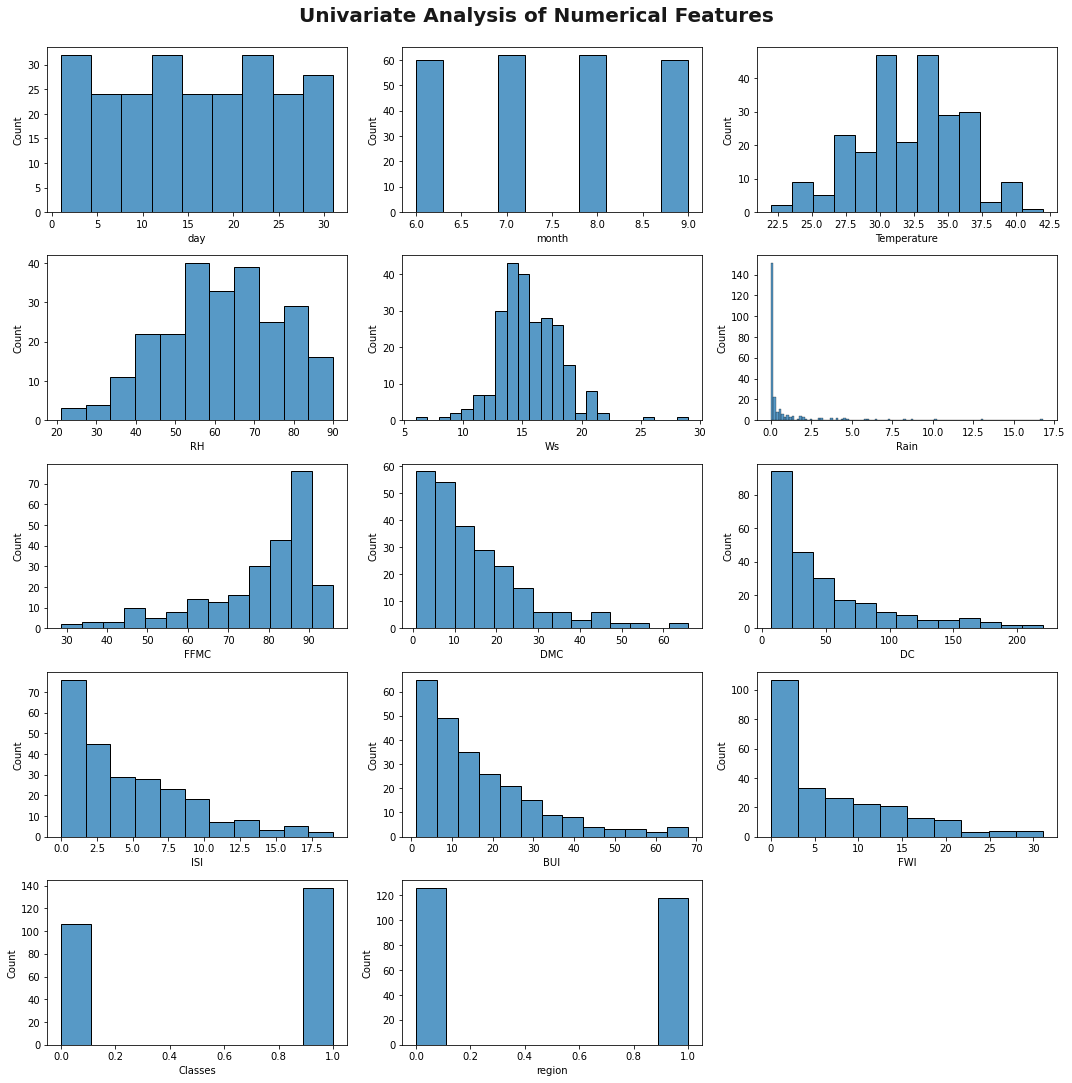

In [20]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.9, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.histplot(x=df[numeric_features[i]])
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

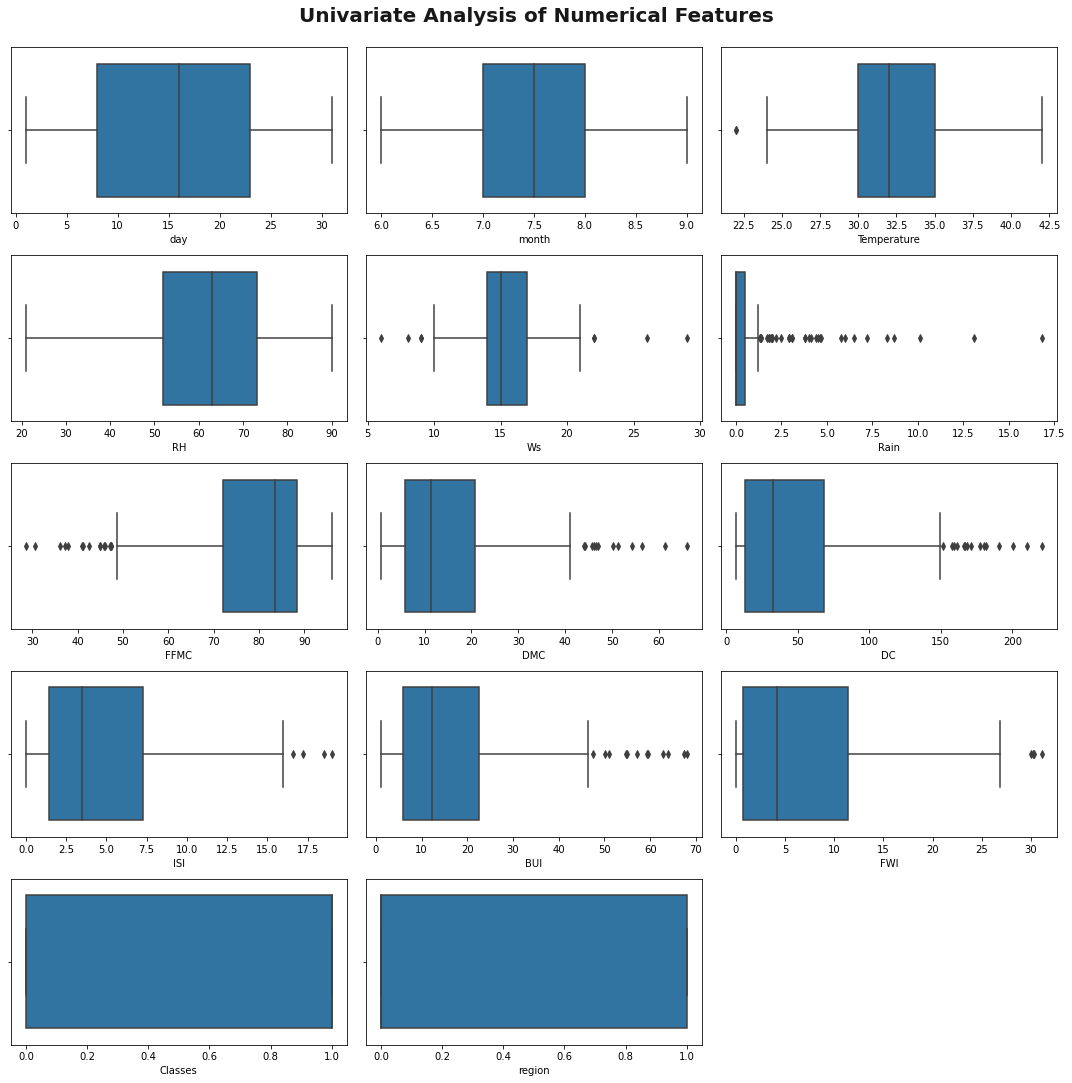

In [21]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.9, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(x=df[numeric_features[i]])
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

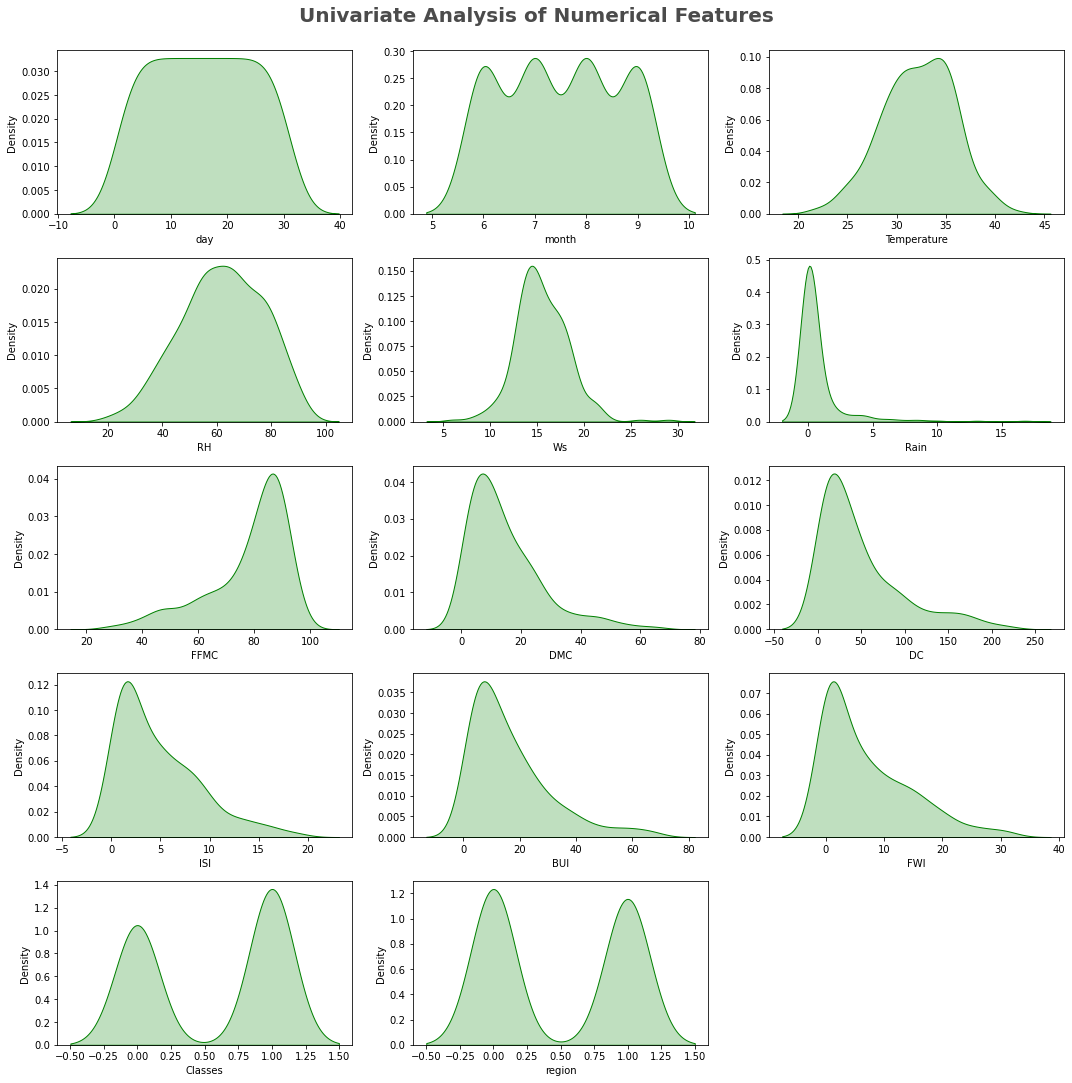

In [22]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.7, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='g')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

## Categorical Features

In [23]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=30, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(categorical_features)):
    plt.subplot(3, 2, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.xticks(rotation=56)
    plt.tight_layout()

<Figure size 1440x1080 with 0 Axes>

In [24]:
df.corr()

day         month  Temperature        RH        Ws  \
day          1.000000e+00  2.232788e-17     0.095772 -0.074209  0.047001   
month        2.232788e-17  1.000000e+00    -0.059017 -0.037884 -0.041447   
Temperature  9.577222e-02 -5.901677e-02     1.000000 -0.654443 -0.278132   
RH          -7.420934e-02 -3.788419e-02    -0.654443  1.000000  0.236084   
Ws           4.700086e-02 -4.144673e-02    -0.278132  0.236084  1.000000   
Rain        -1.122654e-01  3.532207e-02    -0.326786  0.222968  0.170169   
FFMC         2.240321e-01  1.557668e-02     0.677491 -0.645658 -0.163255   
DMC          4.915710e-01  6.817778e-02     0.483105 -0.405133 -0.001246   
DC           5.279285e-01  1.276719e-01     0.370498 -0.220330  0.076245   
ISI          1.777266e-01  6.168011e-02     0.607551 -0.690637  0.015248   
BUI          5.172292e-01  8.582162e-02     0.455504 -0.348587  0.029756   
FWI          3.508824e-01  8.420132e-02     0.558393 -0.569997  0.028799   
Classes      2.017844e-01  2.233266e-02     0.518119 -0.435023 -0.066529   
region       4.936942e-02  4.430336e-02     0.291031 -0.428863 -0.150557   

                 Rain      FFMC       DMC        DC       ISI       BUI  \
day         -0.112265  0.224032  0.491571  0.527929  0.177727  0.517229   
month        0.035322  0.015577  0.068178  0.127672  0.061680  0.085822   
Temperature -0.326786  0.677491  0.483105  0.370498  0.607551  0.455504   
RH           0.222968 -0.645658 -0.405133 -0.220330 -0.690637 -0.348587   
Ws           0.170169 -0.163255 -0.001246  0.076245  0.015248  0.029756   
Rain         1.000000 -0.544045 -0.288548 -0.296804 -0.347105 -0.299171   
FFMC        -0.544045  1.000000  0.602391  0.503910  0.739730  0.589652   
DMC         -0.288548  0.602391  1.000000  0.875358  0.674499  0.982073   
DC          -0.296804  0.503910  0.875358  1.000000  0.498909  0.941904   
ISI         -0.347105  0.739730  0.674499  0.498909  1.000000  0.635891   
BUI         -0.299171  0.589652  0.982073  0.941904  0.635891  1.000000   
FWI         -0.322682  0.686033  0.874778  0.740189  0.907461  0.857771   
Classes     -0.379449  0.770114  0.584188  0.507122  0.735511  0.583882   
region      -0.056135  0.265296  0.221823 -0.054240  0.298869  0.117940   

                  FWI   Classes    region  
day          0.350882  0.201784  0.049369  
month        0.084201  0.022333  0.044303  
Temperature  0.558393  0.518119  0.291031  
RH          -0.569997 -0.435023 -0.428863  
Ws           0.028799 -0.066529 -0.150557  
Rain        -0.322682 -0.379449 -0.056135  
FFMC         0.686033  0.770114  0.265296  
DMC          0.874778  0.584188  0.221823  
DC           0.740189  0.507122 -0.054240  
ISI          0.907461  0.735511  0.298869  
BUI          0.857771  0.583882  0.117940  
FWI          1.000000  0.713357  0.221859  
Classes      0.713357  1.000000  0.202882  
region       0.221859  0.202882  1.000000

## BIVARIATE ANALYSIS

Which Area has most of the time fire happen

<AxesSubplot:xlabel='region', ylabel='Classes'>

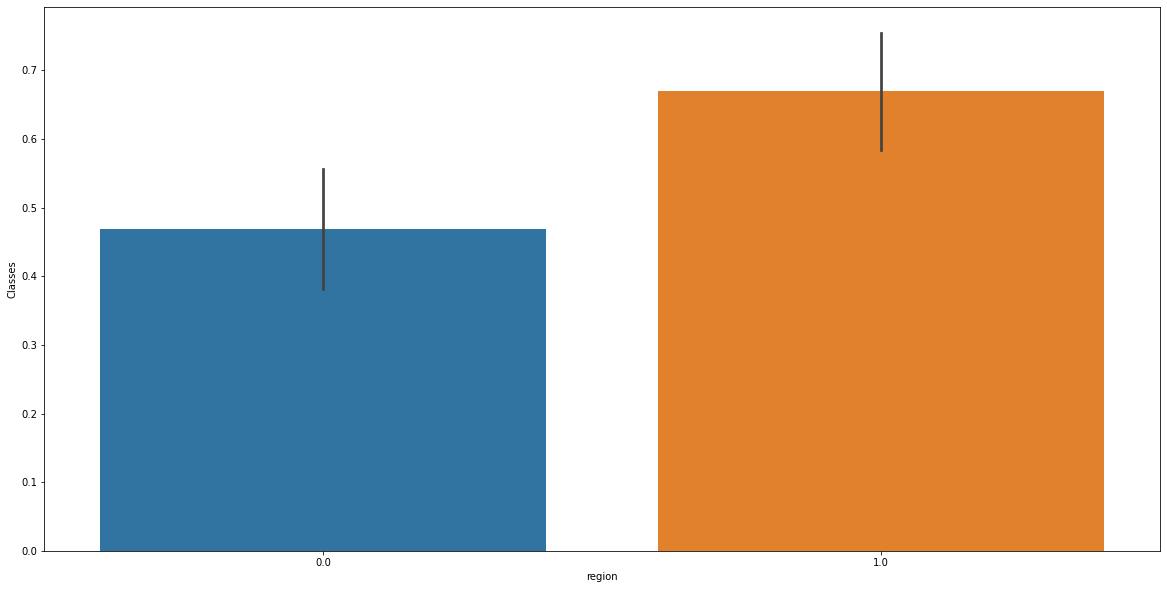

In [25]:
# It is categorical variable for missing vaue we have to replace with mode
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)

sns.barplot(x="region",y="Classes",data=df)

Maximum Temperature

In [26]:
df['Temperature'].max()

42

Minimum Temperature

In [27]:
df['Temperature'].min()

22

## Which Region has most Rain happens

<AxesSubplot:xlabel='region', ylabel='Rain'>

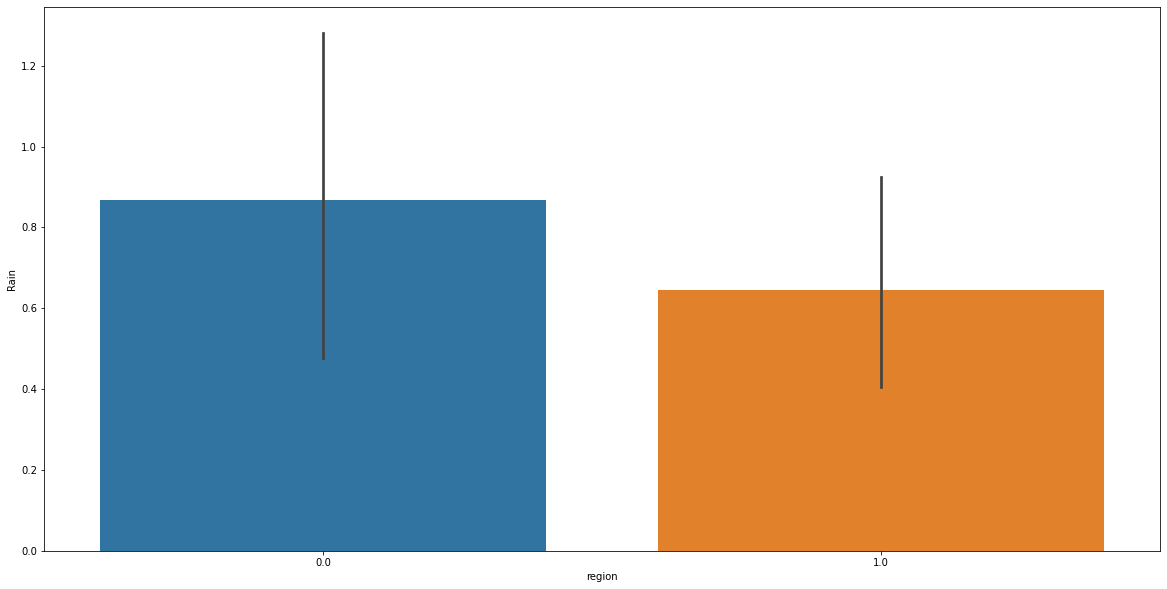

In [28]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)

sns.barplot(x="region",y="Rain",data=df)

## Multivariate Analysis

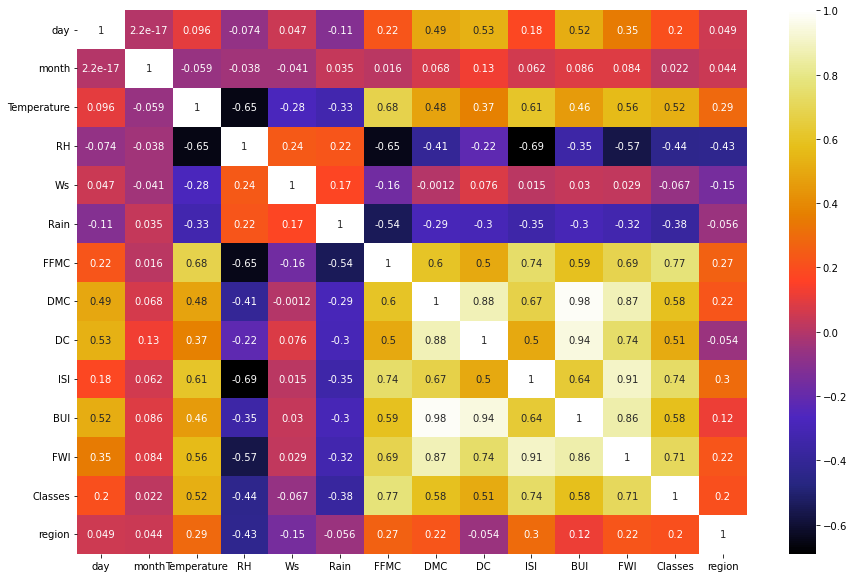

In [29]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='CMRmap',annot=True)
plt.show()

C:\Users\Shivanand\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1080x1080 with 0 Axes>

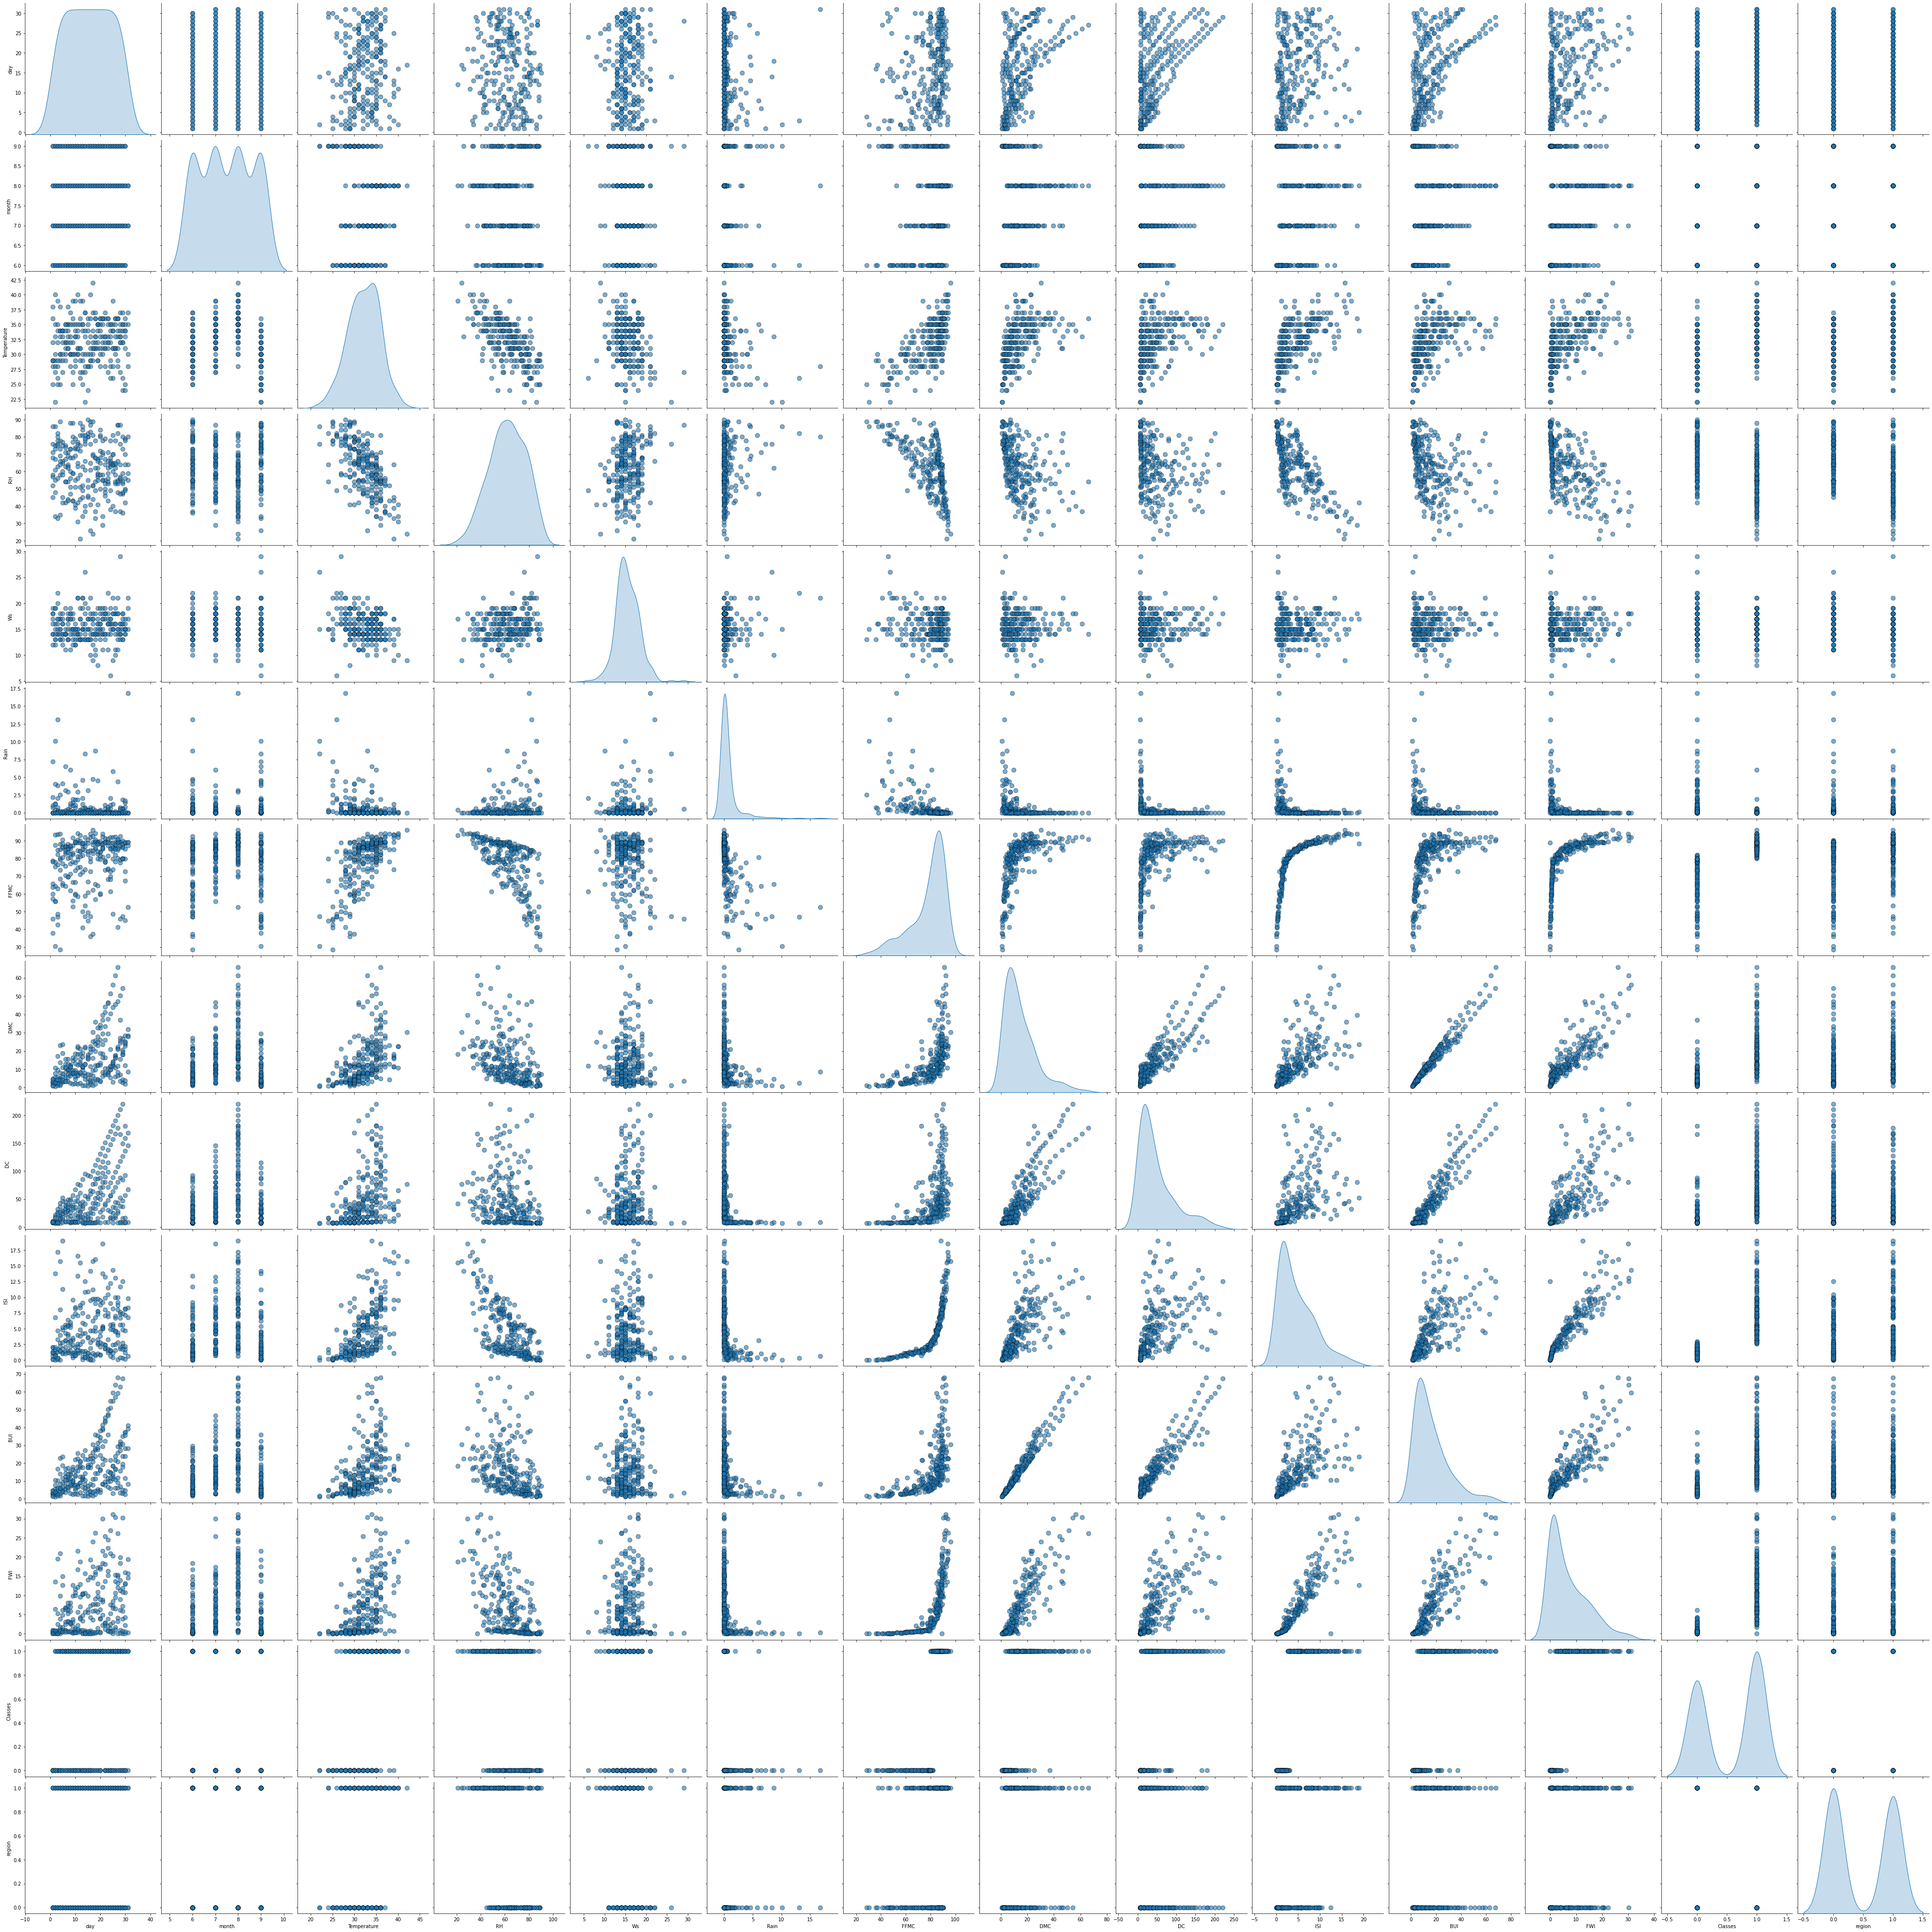

In [30]:
plt.figure(figsize=(15,15))
plt.suptitle('Multivariate Analysis', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
sns.pairplot(df,  diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)

# <font color='red'>Visualisation of Target Feature</font> 

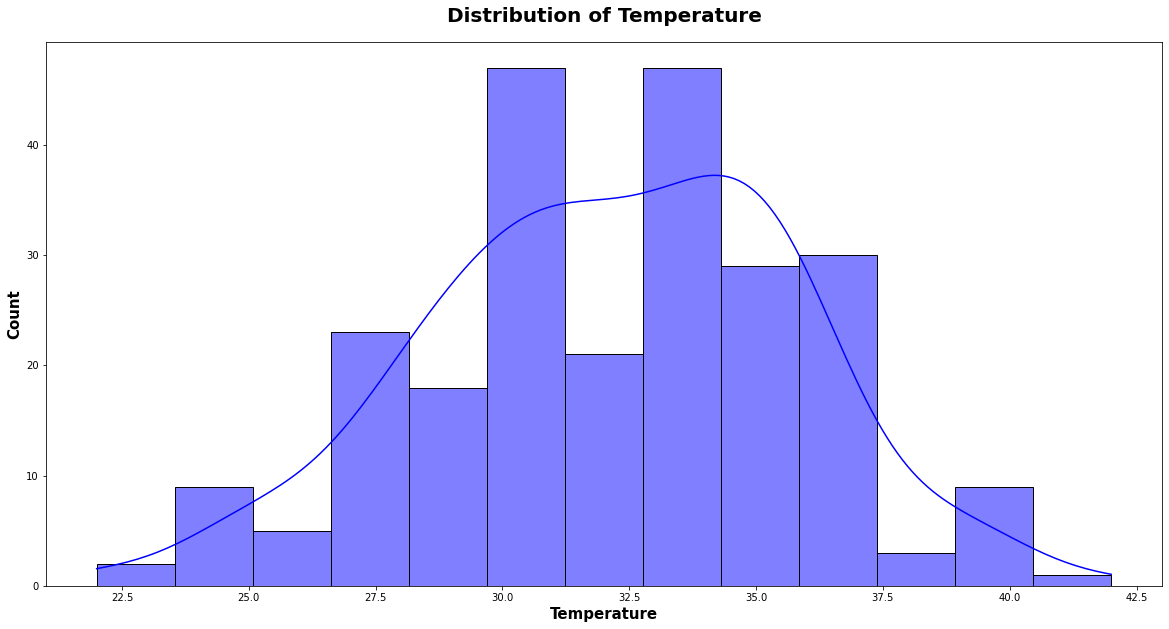

In [31]:
plt.subplots(figsize=(20,10))
sns.histplot("Distribution of Temperature",x=df.Temperature,color='b',kde=True)
plt.title("Distribution of Temperature",weight='bold',fontsize=20,pad=20)
plt.xlabel("Temperature",weight='bold',fontsize=15)
plt.ylabel("Count",weight='bold',fontsize=15)
plt.show()

# Observation:
1. Temperatue occurs most of the time in range 32.5 to 35.0

# <font color='red'>Highest Temperatue Attained</font>

<AxesSubplot:xlabel='Temperature', ylabel='Classes'>

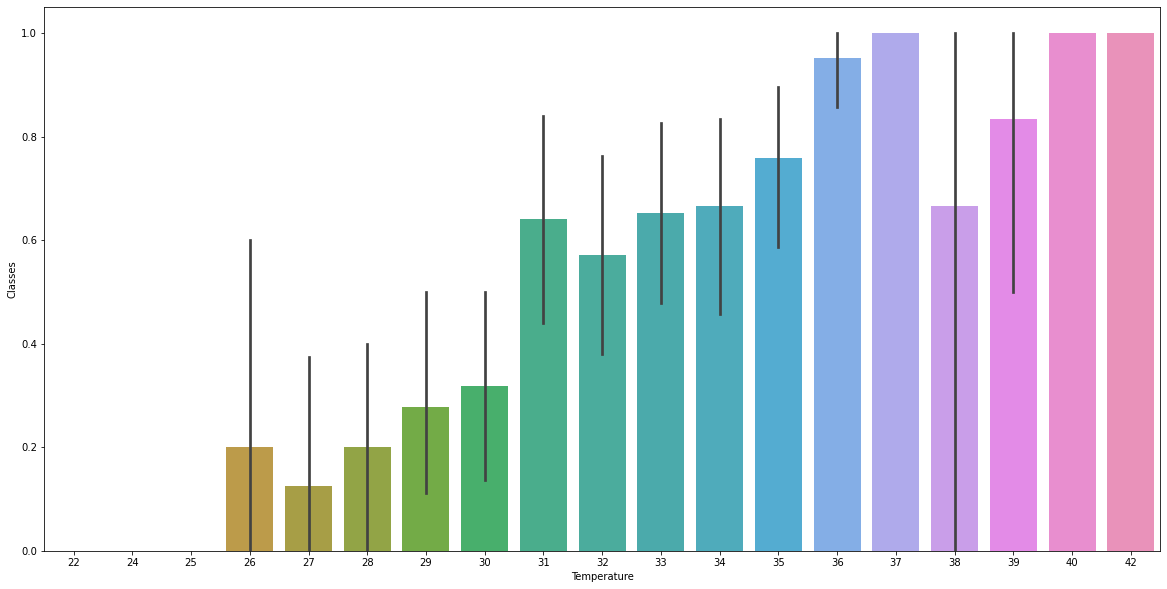

In [32]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)

sns.barplot(x="Temperature",y="Classes",data=df)

# Observation:
1. Highest temperature is 42,40,37

# REG PLOT

In [33]:
num_col=[feature for feature in df.columns if df[feature].dtype != 'O']
num_col

['day',
 'month',
 'Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'Classes',
 'region']

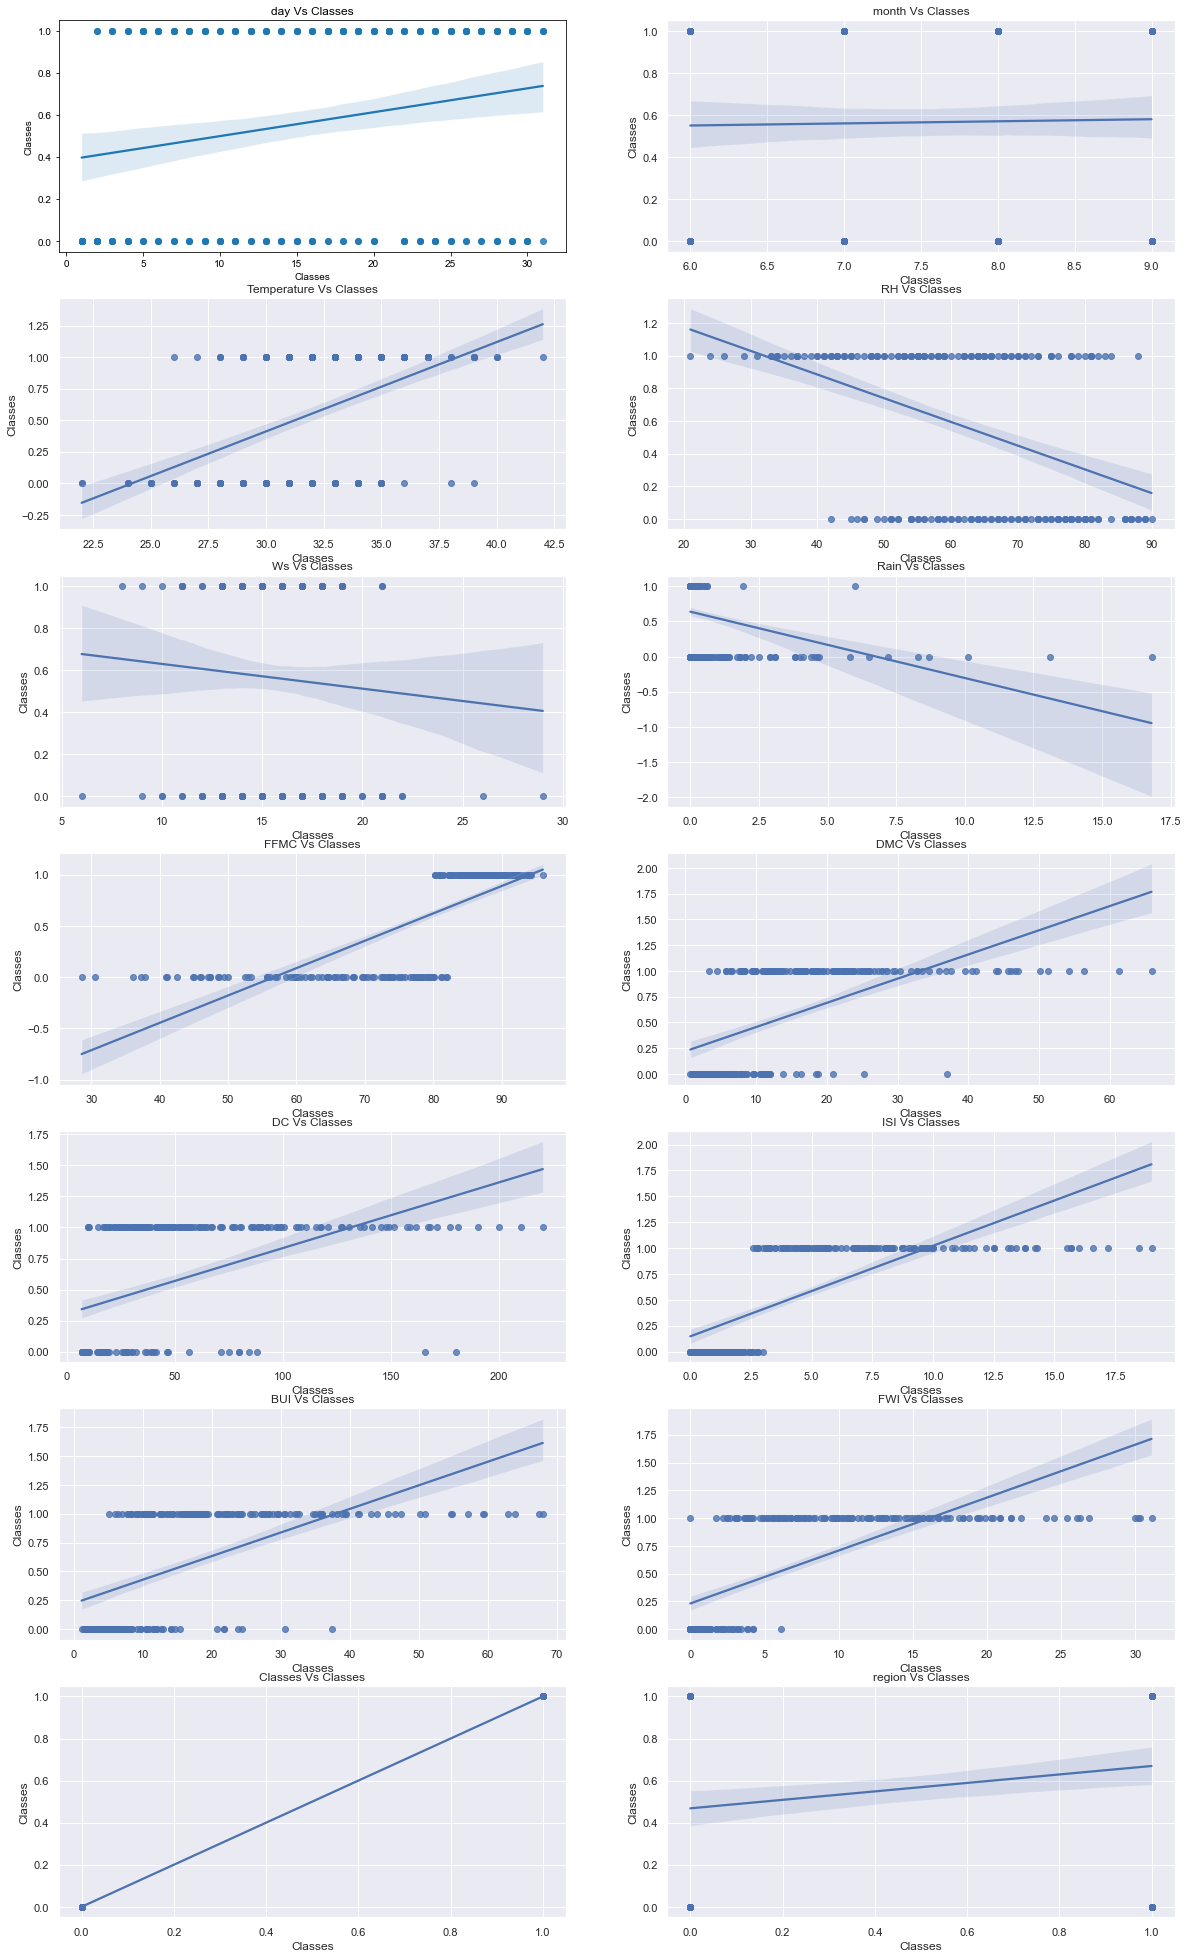

In [34]:
plt.figure(figsize=(20,40))
for i in enumerate(num_col):
    plt.subplot(8,2,i[0]+1)
    sns.set(rc={'figure.figsize':(8,10)})
    sns.regplot(data=df,x=i[1],y='Classes')
    plt.xlabel('Classes')
    plt.title('{} Vs Classes'.format(i[1]))

## BoxPlot to find Outliers in the features

<AxesSubplot:>

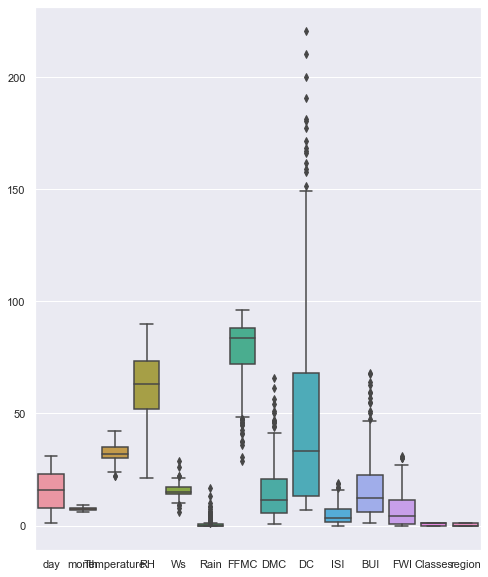

In [35]:
import seaborn as sns
sns.boxplot(data=df)

# Outliers Detected :
1. Temperature
2. Ws
3. Rain
4. FFMC
5. DMC
6. DC
7. ISI
8. BUI
9. FWI

# Outliers not Detected :
1. day
2. Month
3. Year
    

C:\Users\Shivanand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Shivanand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Shivanand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Shivanand\

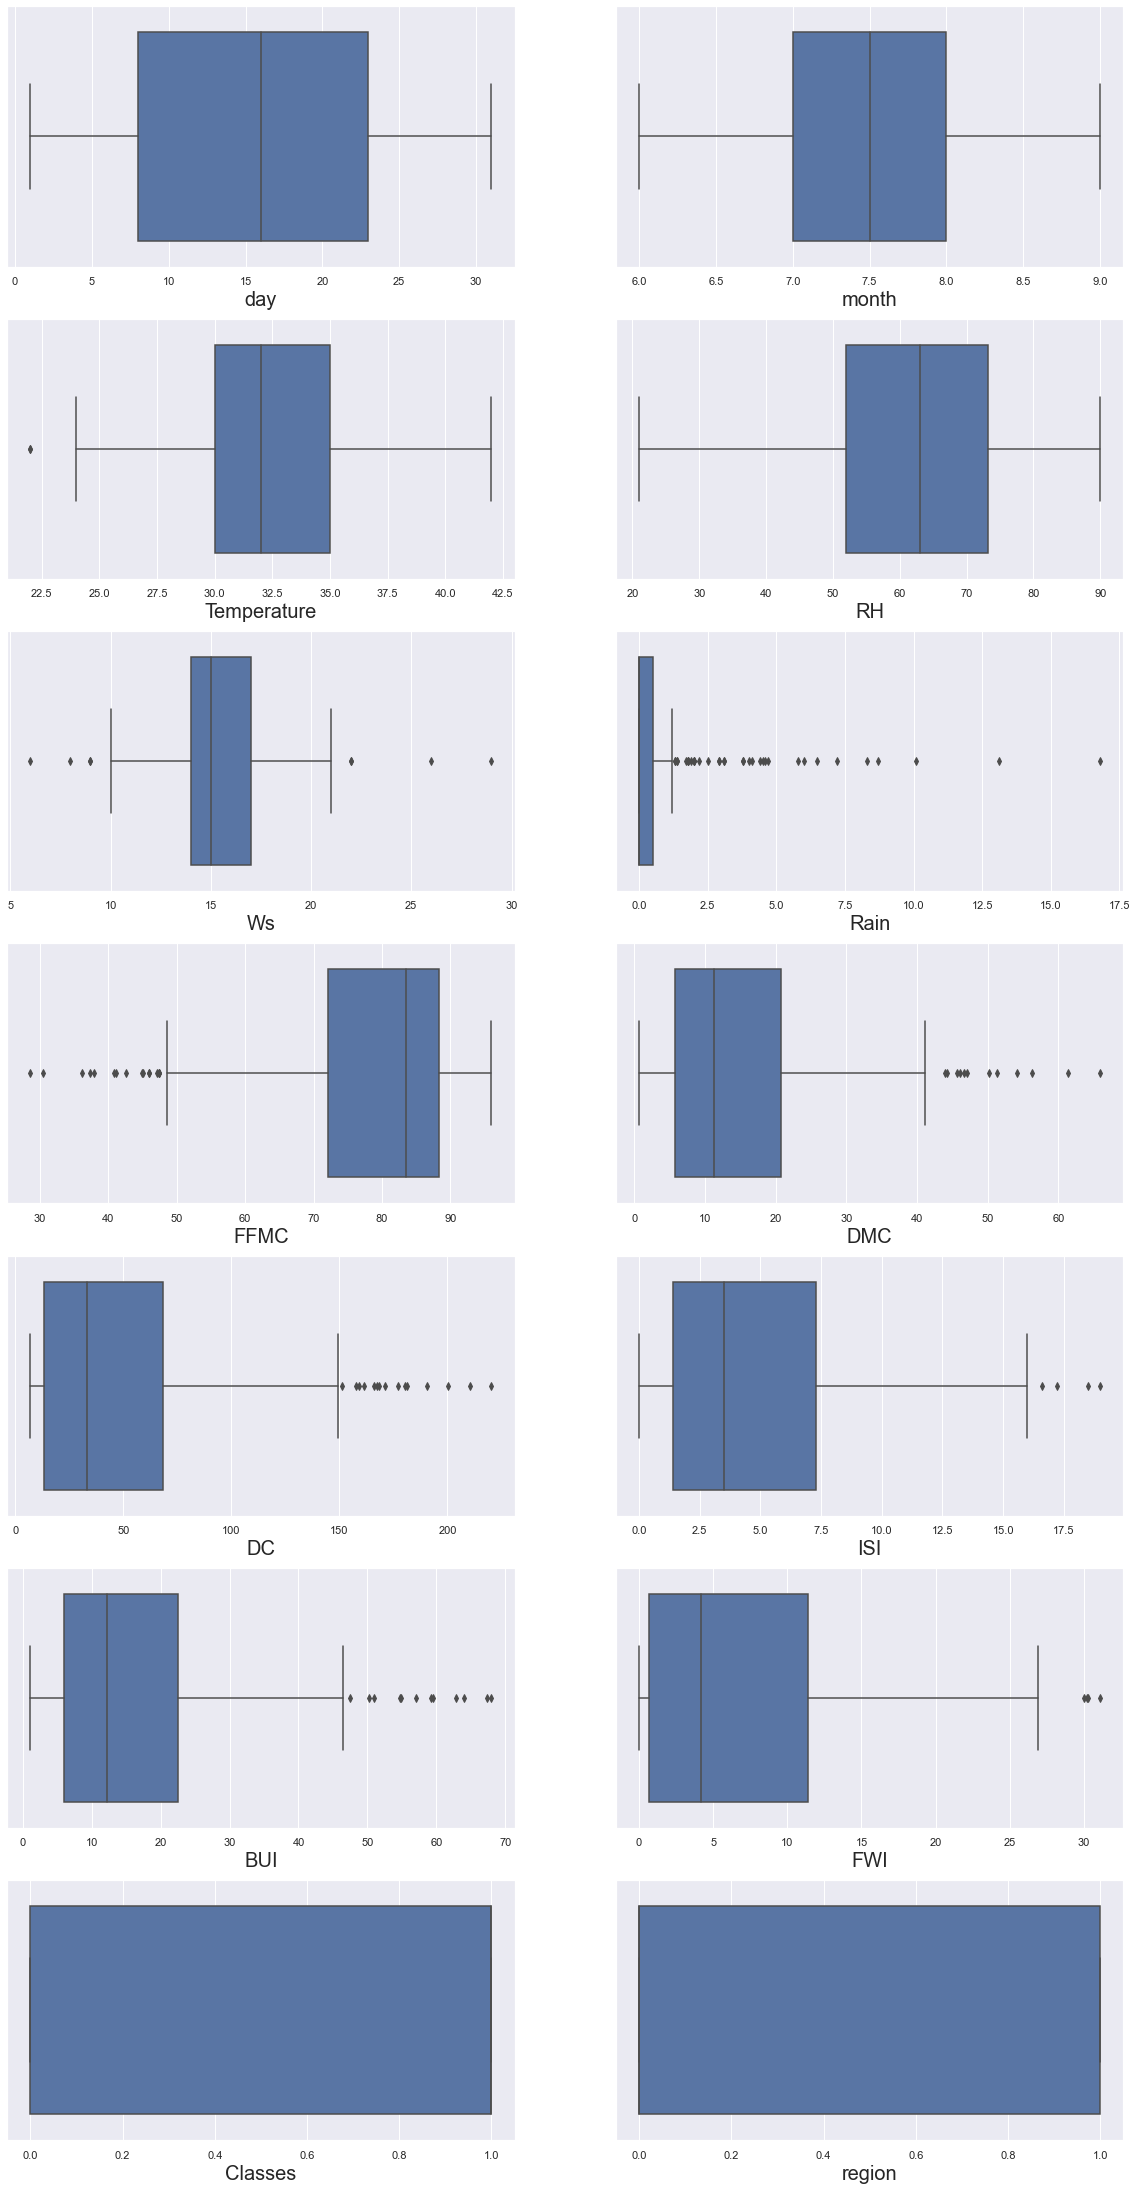

In [36]:
plt.figure(figsize=(20,45), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=15 :     # as there are 15 columns in the data
        ax = plt.subplot(8,2,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

# Observation:
1. WS, Rain, FFMC, DMC, BUI has many outliers.

# REMOVING OR DROPING OUTLIERS

In [37]:
def outliers_imputation_mild(df,column):
    IQR=df[column].quantile(0.75)-df[column].quantile(0.25)
    lower_fence=df[column].quantile(0.25)-(IQR*1.5)
    upper_fence=df[column].quantile(0.75)+(IQR*1.5)
    print("IQR:",IQR)
    print(f"Lower Fence {column}:",lower_fence)
    print(f"Upper Fence {column}:",upper_fence)
    print("____________________________________________")
    df.loc[df[column]<=lower_fence,column]=lower_fence
    df.loc[df[column]>=upper_fence,column]=upper_fence 

In [38]:
columns = df.columns

In [39]:
for i in columns:
    outliers_imputation_mild(df,i)

IQR: 15.0
Lower Fence day: -14.5
Upper Fence day: 45.5
____________________________________________
IQR: 1.0
Lower Fence month: 5.5
Upper Fence month: 9.5
____________________________________________
IQR: 5.0
Lower Fence Temperature: 22.5
Upper Fence Temperature: 42.5
____________________________________________
IQR: 21.25
Lower Fence RH: 20.125
Upper Fence RH: 105.125
____________________________________________
IQR: 3.0
Lower Fence Ws: 9.5
Upper Fence Ws: 21.5
____________________________________________
IQR: 0.5
Lower Fence Rain: -0.75
Upper Fence Rain: 1.25
____________________________________________
IQR: 16.224999999999994
Lower Fence FFMC: 47.73750000000001
Upper Fence FFMC: 112.63749999999999
____________________________________________
IQR: 14.95
Lower Fence DMC: -16.624999999999996
Upper Fence DMC: 43.175
____________________________________________
IQR: 54.87500000000001
Lower Fence DC: -69.03750000000002
Upper Fence DC: 150.46250000000003
___________________________________

# Again Checking the outliers 

C:\Users\Shivanand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Shivanand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Shivanand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Shivanand\

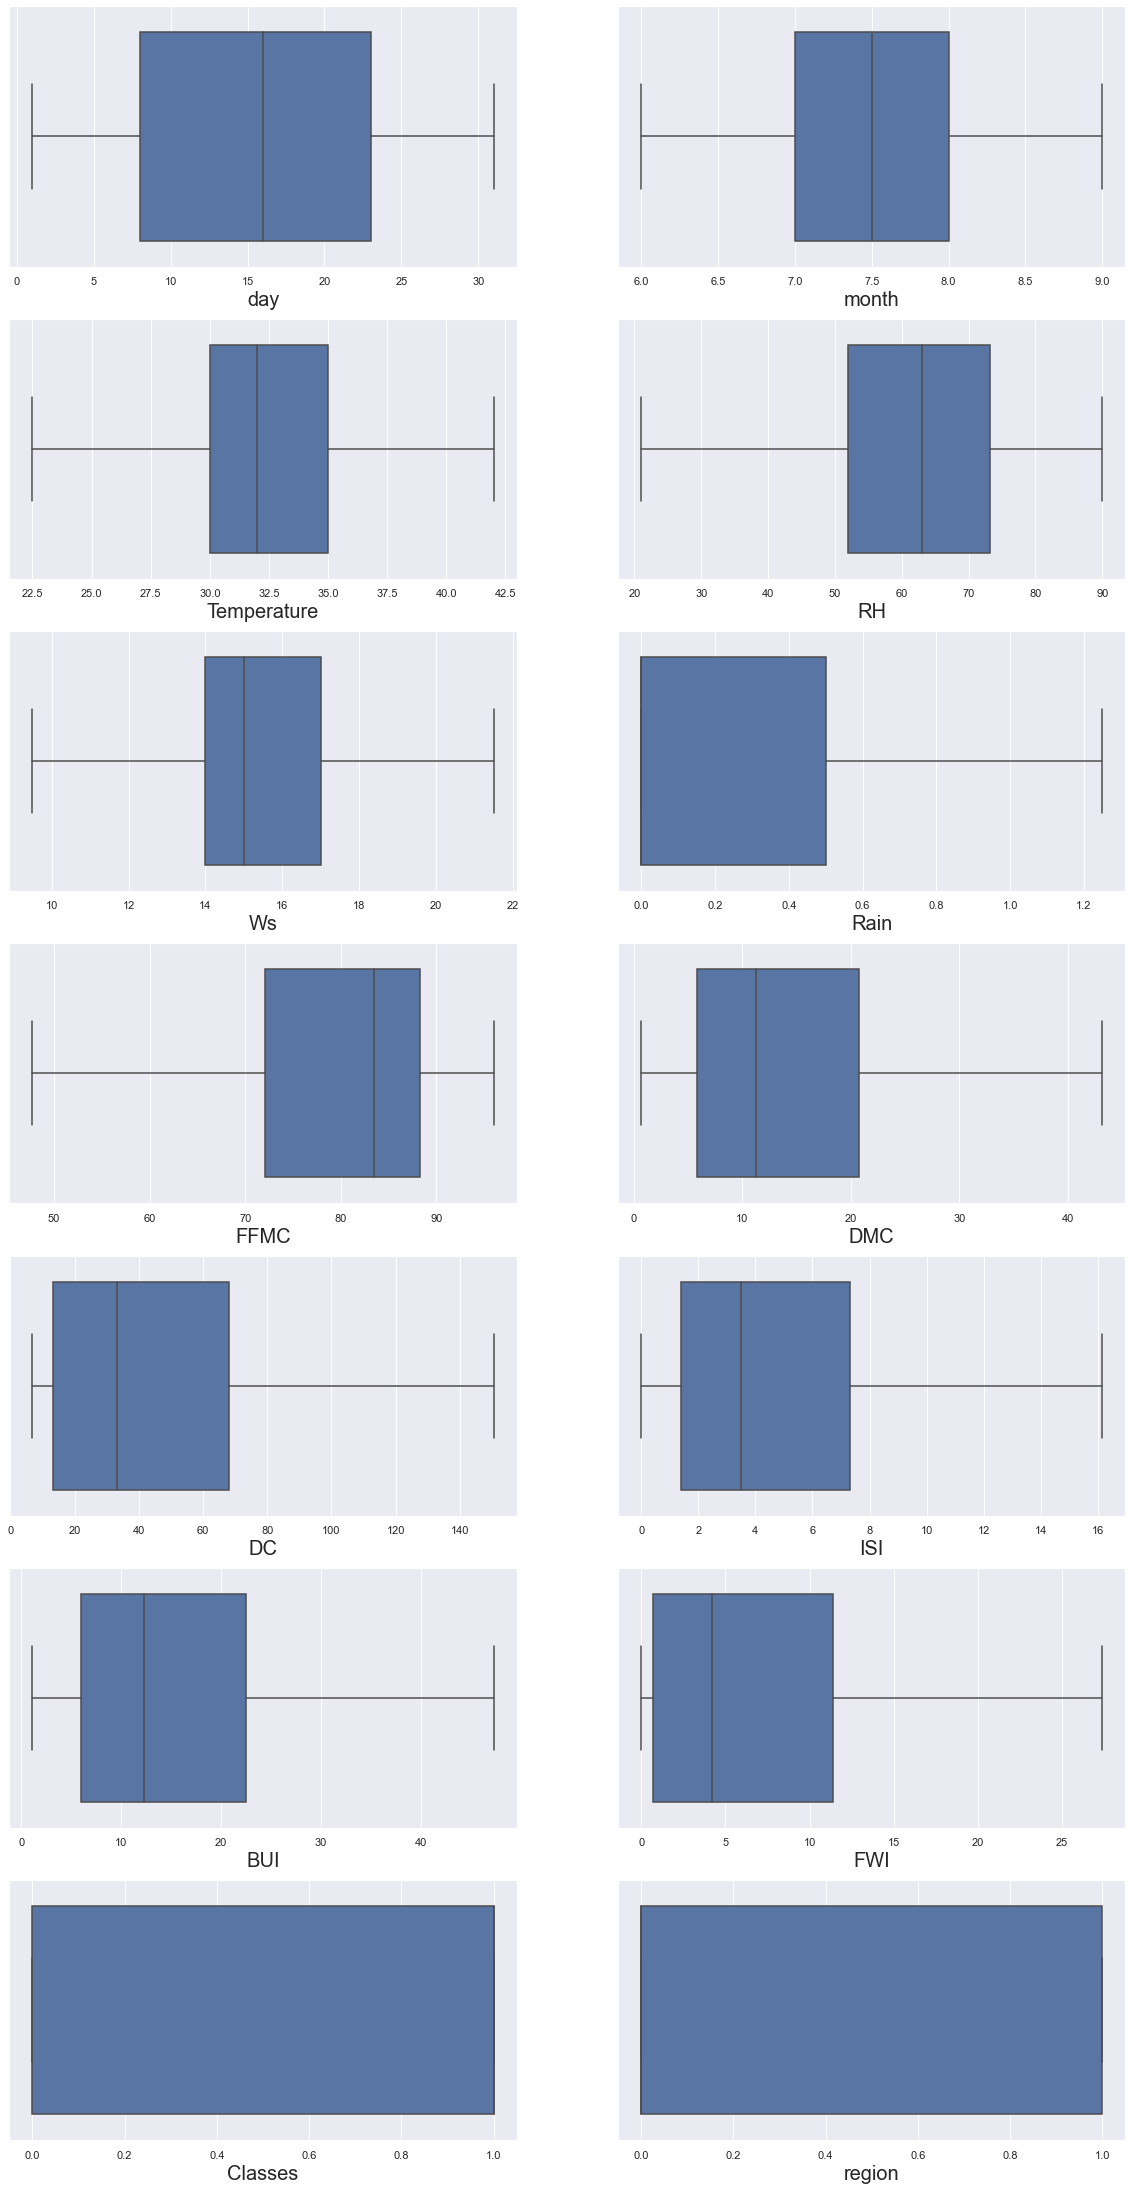

In [40]:
plt.figure(figsize=(20,45), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=15 :     # as there are 15 columns in the data
        ax = plt.subplot(8,2,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

# Observation:
1. Now outliers are not present in any Feature

# <font color='brown'>Creating Independent and Dependent Features</font>

In [41]:
X = df.drop(columns = ['Classes'])
y = df['Classes']

In [42]:
X.head()   #Independent Feature

day  month  Temperature    RH    Ws  Rain     FFMC  DMC    DC  ISI  BUI  \
0  1.0    6.0         29.0  57.0  18.0  0.00  65.7000  3.4   7.6  1.3  3.4   
1  2.0    6.0         29.0  61.0  13.0  1.25  64.4000  4.1   7.6  1.0  3.9   
2  3.0    6.0         26.0  82.0  21.5  1.25  47.7375  2.5   7.1  0.3  2.7   
3  4.0    6.0         25.0  89.0  13.0  1.25  47.7375  1.3   6.9  0.0  1.7   
4  5.0    6.0         27.0  77.0  16.0  0.00  64.8000  3.0  14.2  1.2  3.9   

   FWI  region  
0  0.5     0.0  
1  0.4     0.0  
2  0.1     0.0  
3  0.0     0.0  
4  0.5     0.0

In [43]:
y.head()    #Dependent Feature

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Classes, dtype: float64

# <font color=green> Relation between Independent and Dependent Variable</font>

C:\Users\Shivanand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Shivanand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Shivanand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\S

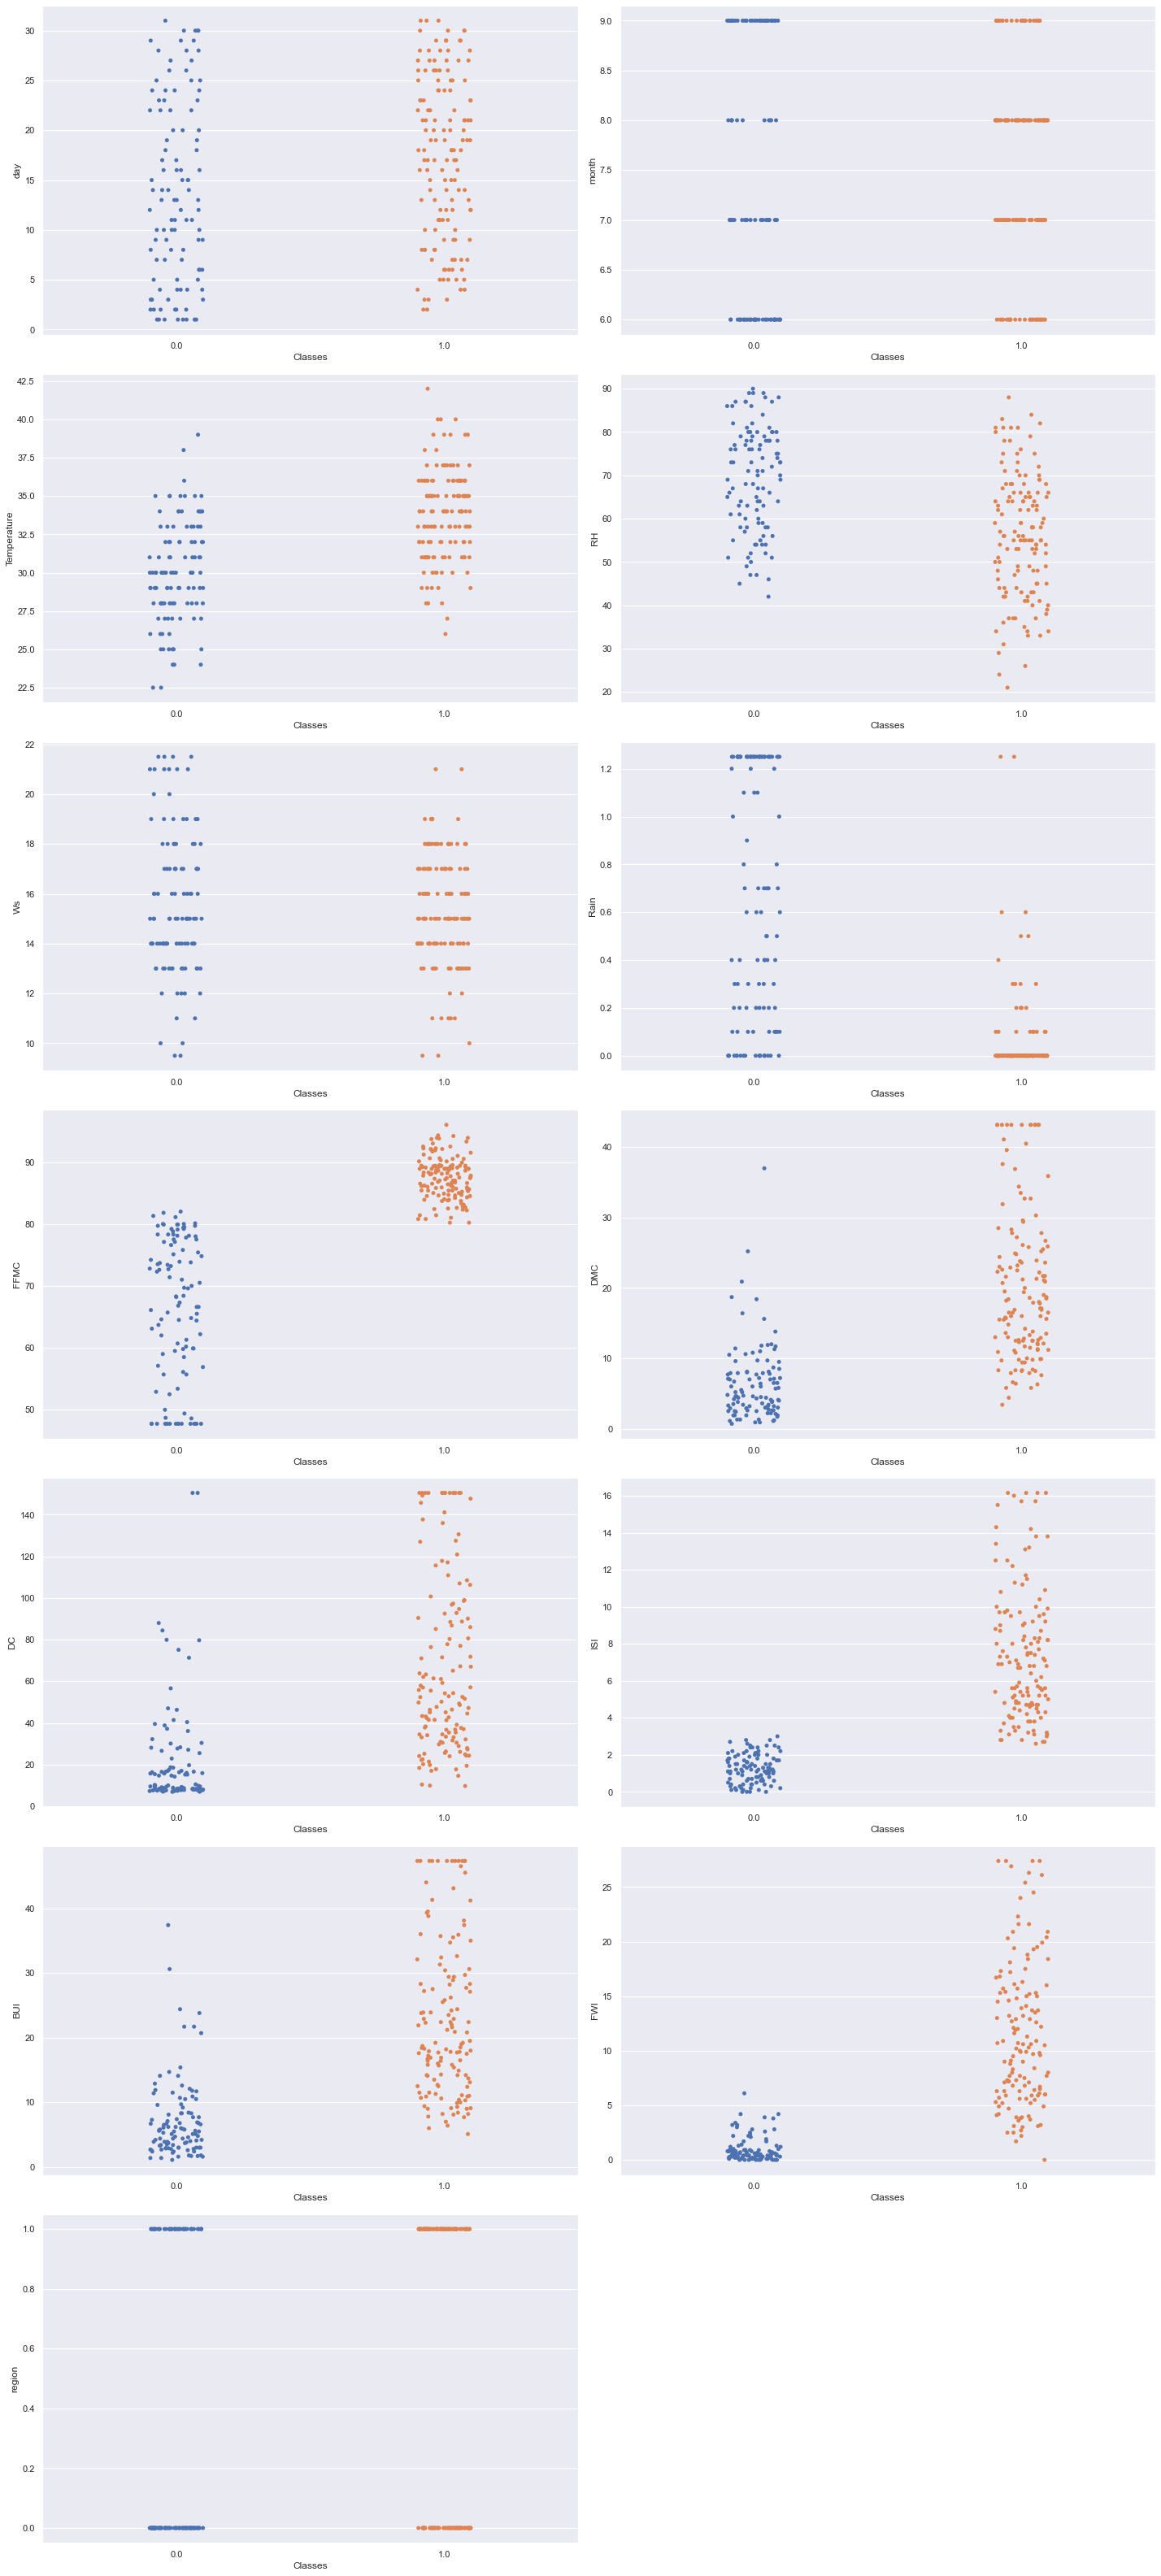

In [44]:
plt.figure(figsize=(20,50), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=15 :
        ax = plt.subplot(8,2,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

# <font color = orange> Importing SKlearn Libraries for Logistic Regression </font>

In [45]:
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import  LogisticRegression
from sklearn.model_selection import train_test_split

# <font color = orange > Train Test Split </font>

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

# <font color = blue >Logistic Model Training </font>

In [47]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()

In [48]:
classifier.fit(X_train,y_train)

C:\Users\Shivanand\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
X_train.head()

day  month  Temperature    RH    Ws  Rain     FFMC   DMC     DC   ISI  \
58   29.0    7.0         32.0  73.0  15.0  0.00  86.6000  26.7  127.0   5.6   
1     2.0    6.0         29.0  61.0  13.0  1.25  64.4000   4.1    7.6   1.0   
2     3.0    6.0         26.0  82.0  21.5  1.25  47.7375   2.5    7.1   0.3   
68    8.0    8.0         32.0  60.0  18.0  0.30  77.1000  11.3   47.0   2.2   
184   2.0    8.0         40.0  34.0  14.0  0.00  93.3000  10.8   21.4  13.8   

      BUI   FWI  region  
58   35.0  11.9     0.0  
1     3.9   0.4     0.0  
2     2.7   0.1     0.0  
68   14.1   2.6     0.0  
184  10.6  13.5     1.0

In [50]:
y_train.head()

58     1.0
1      0.0
2      0.0
68     0.0
184    1.0
Name: Classes, dtype: float64

In [51]:
y_pred = classifier.predict(X_test)

In [53]:
X_test.head()

day  month  Temperature    RH    Ws  Rain  FFMC   DMC     DC  ISI   BUI  \
162  11.0    7.0         34.0  56.0  15.0  1.25  74.8   7.1    9.5  1.6   6.8   
60   31.0    7.0         35.0  64.0  17.0  0.00  87.2  31.9  145.7  6.8  41.2   
61    1.0    8.0         36.0  45.0  14.0  0.00  78.8   4.8   10.2  2.0   4.7   
63    3.0    8.0         35.0  63.0  14.0  0.30  76.6   5.7   10.0  1.7   5.5   
69    9.0    8.0         35.0  59.0  17.0  0.00  87.4  14.8   57.0  6.9  17.9   

      FWI  region  
162   0.8     1.0  
60   15.7     0.0  
61    0.9     0.0  
63    0.8     0.0  
69    9.9     0.0

# <font color = blue > Prediction </font>

In [54]:
y_pred = classifier.predict(X_test)

In [55]:
y_pred

array([0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       1., 1., 1., 1., 0., 1., 1., 0., 1., 0.])

# <font color = green> Accuracy Score </font>

In [56]:
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(y_pred,y_test)
print(score)

0.9180327868852459


# Classification Report

In [57]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       1.00      0.79      0.88        24
         1.0       0.88      1.00      0.94        37

    accuracy                           0.92        61
   macro avg       0.94      0.90      0.91        61
weighted avg       0.93      0.92      0.92        61



# Performance Metrics

Confusion Metrics

In [58]:
from sklearn.metrics import accuracy_score, confusion_matrix
conf_mat=confusion_matrix(y_pred,y_test)

In [59]:
conf_mat

array([[19,  5],
       [ 0, 37]], dtype=int64)

In [60]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [61]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.9180327868852459

# Precision

In [62]:
Precision = true_positive/(true_positive+false_positive)
Precision


0.7916666666666666

# Recall

In [63]:
Recall = true_positive/(true_positive+false_negative)
Recall

1.0

# F1 Score

In [64]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)

F1_Score

0.8837209302325582

#                                           <font color =                   red >                          THANK YOU </font>